# Task 1 - User Overview Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('telcom_data.xlsx')

In [3]:
df.shape

(150001, 55)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [5]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
df.isna().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

Identifying the top 10 handsets used by the customers

In [7]:
top_10_handsets = df["Handset Type"].value_counts().head(10)
for handset, count in top_10_handsets.items():
    print(f"{handset}: {count}")

Huawei B528S-23A: 19752
Apple iPhone 6S (A1688): 9419
Apple iPhone 6 (A1586): 9023
undefined: 8987
Apple iPhone 7 (A1778): 6326
Apple iPhone Se (A1723): 5187
Apple iPhone 8 (A1905): 4993
Apple iPhone Xr (A2105): 4568
Samsung Galaxy S8 (Sm-G950F): 4520
Apple iPhone X (A1901): 3813


Identify the top 3 handset manufacturers

In [8]:
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)

top_3_manufacturers_df = top_3_manufacturers.to_frame().reset_index()
top_3_manufacturers_df.columns = ['Manufacturer', 'Count']

print(top_3_manufacturers_df)

  Manufacturer  Count
0        Apple  59565
1      Samsung  40839
2       Huawei  34423


Identify the top 5 handsets per top 3 handset manufacturer

In [9]:
top_5_handsets_per_manufacturer={}
for manufacturer in top_3_manufacturers.index:
    manufacturer_data = df[df['Handset Manufacturer']==manufacturer]
    top_5_handsets = manufacturer_data['Handset Type'].value_counts().head(5)
    top_5_handsets_per_manufacturer[manufacturer]=top_5_handsets
    
print("\nTop 5 Handsets per manufacturer:")
for manufacturer, top_5_handsets in top_5_handsets_per_manufacturer.items():
    print(f"\n Manufacturer: {manufacturer}")
    print(top_5_handsets)


Top 5 Handsets per manufacturer:

 Manufacturer: Apple
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64

 Manufacturer: Samsung
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64

 Manufacturer: Huawei
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64


# Task 1.1 - Your employer wants to have an overview of the users’ behaviour on those applications

• Aggregate per user the following information in the column
     
     • number of xDR sessions
     
     • Session duration
     
     • the total download (DL) and upload (UL) data
     
     • the total data volume (in Bytes) during this session for each application

In [10]:
d={"Xdr_Session":df["Bearer Id"],
  "Dur_msec":df["Dur. (ms)"],
  "Activity Duration DL (ms)":df["Activity Duration DL (ms)"],
  "Activity Duration UL (ms)":df["Activity Duration UL (ms)"],
  "Social Media DL (Bytes)":df["Social Media DL (Bytes)"],
  "Social Media UL (Bytes)":df["Social Media UL (Bytes)"],
  "Google DL (Bytes)":df["Google DL (Bytes)"],
  "Google UL (Bytes)":df["Google UL (Bytes)"],
  "Email DL (Bytes)":df["Email DL (Bytes)"],
  "Email UL (Bytes)":df["Email UL (Bytes)"],
  "Youtube DL (Bytes)":df["Youtube DL (Bytes)"],
  "Youtube UL (Bytes)":df["Youtube UL (Bytes)"],
  "Netflix DL (Bytes)":df["Netflix DL (Bytes)"],
  "Netflix UL (Bytes)":df["Netflix UL (Bytes)"],
  "Gaming DL (Bytes)":df["Gaming DL (Bytes)"],
  "Gaming UL (Bytes)":df["Gaming UL (Bytes)"],
  "Other DL (Bytes)":df["Other DL (Bytes)"],
  "Other UL (Bytes)":df["Other UL (Bytes)"],
  "Total UL (Bytes)":df["Total UL (Bytes)"],
  "Total DL (Bytes)":df["Total DL (Bytes)"]}

In [11]:
data=pd.DataFrame(d)

In [12]:
data

,Xdr_Session,Dur_msec,Activity Duration DL (ms),Activity Duration UL (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,1823652.0,37624.0,38787.0,1.545765e+06,24420.00000,1.634479e+06,1.271433e+06,3.563542e+06,137762.00000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,13114483482878900224,1365104.0,168.0,3560.0,1.926113e+06,7165.00000,3.493924e+06,9.201720e+05,6.290460e+05,308339.00000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,13114483484080500736,1361762.0,0.0,0.0,1.684053e+06,42224.00000,8.535055e+06,1.694064e+06,2.690151e+06,672973.00000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,13114483485442799616,1321509.0,3330.0,37882.0,6.441210e+05,13372.00000,9.023734e+06,2.788027e+06,1.439754e+06,631229.00000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,13114483499480700928,1089009.0,0.0,0.0,8.626000e+05,50188.00000,6.248284e+06,1.500559e+06,1.936496e+06,173853.00000,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,81230.0,42376.0,41915.0,3.464974e+06,52091.00000,9.967603e+06,2.817311e+06,5.763900e+04,633237.00000,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7349883264234609664,97970.0,17264.0,16759.0,2.344568e+06,7613.00000,2.229420e+06,2.185941e+06,1.954414e+06,167304.00000,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,13114483573367300096,98249.0,25003.0,28640.0,1.245845e+06,14394.00000,3.850890e+06,2.734579e+06,1.525734e+06,532543.00000,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,13114483573367300096,97910.0,13405.0,34088.0,8.015470e+05,21562.00000,4.189773e+06,3.567494e+06,2.228270e+06,622644.00000,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


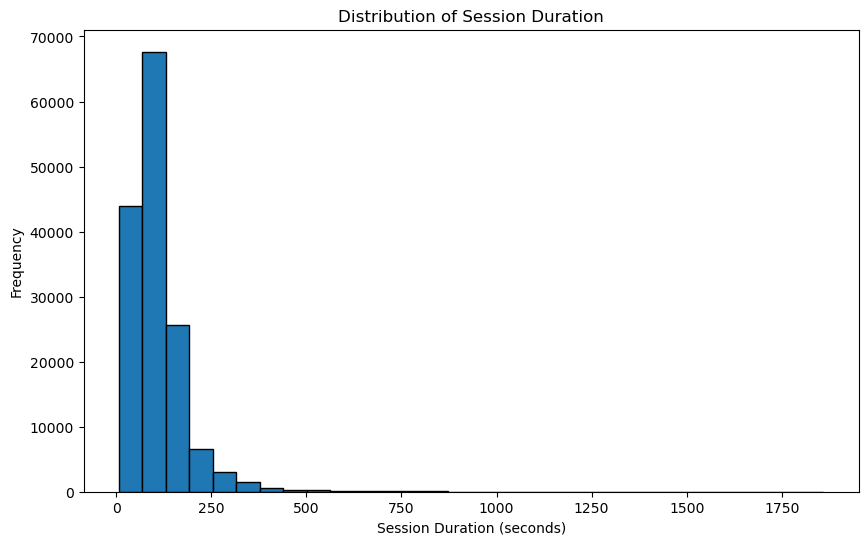

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(data['Dur_msec'] / 1000, bins=30, edgecolor='black')
plt.xlabel('Session Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Session Duration')
plt.show()

In [14]:
telcom_data = data.groupby('Xdr_Session').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

In [15]:
# Calculate the total data volume for each application
total_data = df[['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
                 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']].sum()

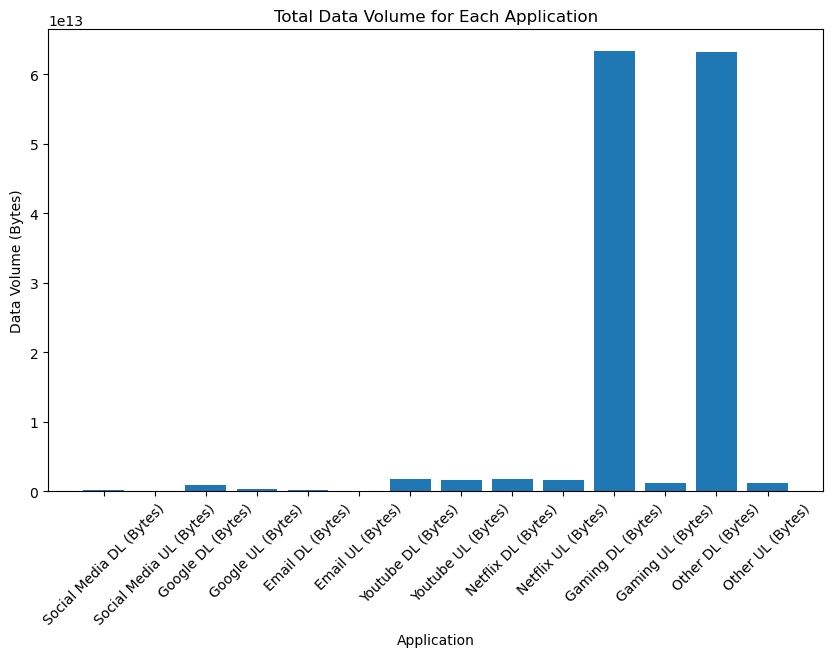

In [16]:
# Plotting the total data volume for each application
applications = total_data.index
data_volume = total_data.values

plt.figure(figsize=(10, 6))
plt.bar(applications, data_volume,)
plt.xlabel('Application')
plt.ylabel('Data Volume (Bytes)')
plt.title('Total Data Volume for Each Application')
plt.xticks(rotation=45)

plt.show()

# Task 1.2

Conduct exploratory data analysis on those data & communicate useful insights. Ensure that you identify and treat all missing values and outliers in the dataset by replacing them with the mean of the corresponding column.

You’re expected to report about the following using Python script and slide :

• Describe all relevant variables and associated data types (slide).

• Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.

• Conduct a Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable and provide useful interpretation.

• Conduct a Graphical Univariate Analysis by identifying the most suitable plotting options for each variable and interpreting your findings.

• Bivariate Analysis – explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings.

• Variable transformations – segment the users into the top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class.

• Correlation Analysis – compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, and Other data

• Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points maximum).

In [17]:
data.dtypes

Xdr_Session                   object
Dur_msec                     float64
Activity Duration DL (ms)    float64
Activity Duration UL (ms)    float64
Social Media DL (Bytes)      float64
Social Media UL (Bytes)      float64
Google DL (Bytes)            float64
Google UL (Bytes)            float64
Email DL (Bytes)             float64
Email UL (Bytes)             float64
Youtube DL (Bytes)           float64
Youtube UL (Bytes)           float64
Netflix DL (Bytes)           float64
Netflix UL (Bytes)           float64
Gaming DL (Bytes)            float64
Gaming UL (Bytes)            float64
Other DL (Bytes)             float64
Other UL (Bytes)             float64
Total UL (Bytes)             float64
Total DL (Bytes)             float64
dtype: object

In [18]:
data.describe()

,Dur_msec,Activity Duration DL (ms),Activity Duration UL (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.500000e+05,1.500000e+05,1.500000e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.046086e+05,1.829177e+06,1.408880e+06,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,8.103762e+04,5.696395e+06,4.643231e+06,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,7.142000e+03,0.000000e+00,0.000000e+00,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,5.744050e+04,1.487775e+04,2.153975e+04,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,8.639900e+04,3.930450e+04,4.679350e+04,1.794369e+06,32920.000000,5.765829e+06,2.054573e+06,1.793505e+06,466250.000000,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.324302e+05,6.796095e+05,5.990952e+05,2.694938e+06,49334.000000,8.623552e+06,3.088454e+06,2.689327e+06,700440.000000,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.859336e+06,1.365365e+08,1.449113e+08,3.586064e+06,65870.000000,1.146283e+07,4.121357e+06,3.586146e+06,936418.000000,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [19]:
data.head()

,Xdr_Session,Dur_msec,Activity Duration DL (ms),Activity Duration UL (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,1823652.0,37624.0,38787.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,1365104.0,168.0,3560.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,1361762.0,0.0,0.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,1321509.0,3330.0,37882.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,1089009.0,0.0,0.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [20]:
data.isnull().sum()

Xdr_Session                  0
Dur_msec                     1
Activity Duration DL (ms)    1
Activity Duration UL (ms)    1
Social Media DL (Bytes)      0
Social Media UL (Bytes)      0
Google DL (Bytes)            0
Google UL (Bytes)            0
Email DL (Bytes)             0
Email UL (Bytes)             0
Youtube DL (Bytes)           0
Youtube UL (Bytes)           0
Netflix DL (Bytes)           0
Netflix UL (Bytes)           0
Gaming DL (Bytes)            0
Gaming UL (Bytes)            0
Other DL (Bytes)             0
Other UL (Bytes)             0
Total UL (Bytes)             1
Total DL (Bytes)             1
dtype: int64

Fill the missing values:

In [21]:
for i in data.columns:
    
    if data[i].dtype == 'object':
        mode_value = data[i].mode()[0] 
        data[i].fillna(mode_value, inplace=True)
    else:
        mean_value = data[i].mean()
        data[i].fillna(mean_value, inplace=True) 

In [22]:
data.isna().sum()

Xdr_Session                  0
Dur_msec                     0
Activity Duration DL (ms)    0
Activity Duration UL (ms)    0
Social Media DL (Bytes)      0
Social Media UL (Bytes)      0
Google DL (Bytes)            0
Google UL (Bytes)            0
Email DL (Bytes)             0
Email UL (Bytes)             0
Youtube DL (Bytes)           0
Youtube UL (Bytes)           0
Netflix DL (Bytes)           0
Netflix UL (Bytes)           0
Gaming DL (Bytes)            0
Gaming UL (Bytes)            0
Other DL (Bytes)             0
Other UL (Bytes)             0
Total UL (Bytes)             0
Total DL (Bytes)             0
dtype: int64

In [23]:
data_filled = data.fillna(0)

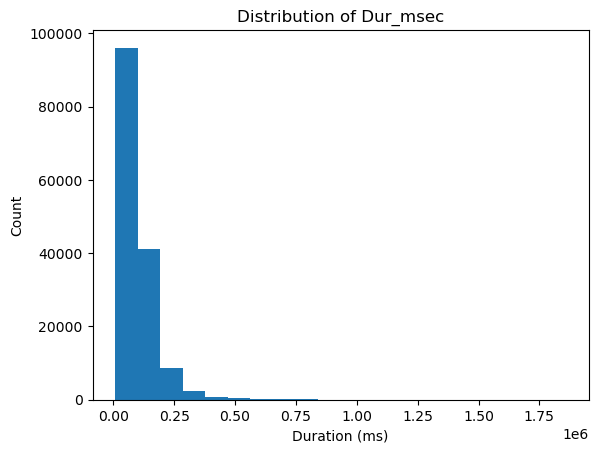

In [24]:
plt.hist(data_filled['Dur_msec'], bins=20)
plt.xlabel('Duration (ms)')
plt.ylabel('Count')
plt.title('Distribution of Dur_msec')
plt.show()

In [25]:
# Univariate Analysis--- dispersion parameters for each quantitative variable:
quantitative_vars = ['Dur_msec', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']

dispersion_stats = pd.DataFrame(columns=['Variable', 'Mean', 'Median', 'Range', 'Interquartile Range', 'Standard Deviation'])

for var in quantitative_vars:
    stats = {}
    stats['Variable'] = var
    stats['Mean'] = data[var].mean()
    stats['Median'] = data[var].median()
    stats['Range'] = data[var].max() - data[var].min()
    stats['Interquartile Range'] = data[var].quantile(0.75) - data[var].quantile(0.25)
    stats['Standard Deviation'] = data[var].std()

    dispersion_stats = dispersion_stats.append(stats, ignore_index=True)

#The dispersion parameters for each variable:
print("Dispersion Parameters:")
print(dispersion_stats)

C:\Users\Naresh\AppData\Local\Temp\ipykernel_4668\1677938206.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dispersion_stats = dispersion_stats.append(stats, ignore_index=True)
C:\Users\Naresh\AppData\Local\Temp\ipykernel_4668\1677938206.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dispersion_stats = dispersion_stats.append(stats, ignore_index=True)
C:\Users\Naresh\AppData\Local\Temp\ipykernel_4668\1677938206.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dispersion_stats = dispersion_stats.append(stats, ignore_index=True)
C:\Users\Naresh\AppData\Local\Temp\ipykernel_4668\1677938206.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

Dispersion Parameters:
                     Variable          Mean       Median        Range  \
0                    Dur_msec  1.046086e+05      86399.0    1852194.0   
1   Activity Duration DL (ms)  1.829177e+06      39305.0  136536461.0   
2   Activity Duration UL (ms)  1.408880e+06      46794.0  144911293.0   
3     Social Media DL (Bytes)  1.795322e+06    1794369.0    3586052.0   
4     Social Media UL (Bytes)  3.292843e+04      32920.0      65870.0   
5           Google DL (Bytes)  5.750753e+06    5765829.0   11462625.0   
6           Google UL (Bytes)  2.056542e+06    2054573.0    4121354.0   
7            Email DL (Bytes)  1.791729e+06    1793505.0    3586132.0   
8            Email UL (Bytes)  4.673734e+05     466250.0     936416.0   
9          Youtube DL (Bytes)  1.163407e+07   11616019.0   23259045.0   
10         Youtube UL (Bytes)  1.100941e+07   11013447.0   22011857.0   
11         Netflix DL (Bytes)  1.162685e+07   11642217.0   23259147.0   
12         Netflix UL (Bytes

C:\Users\Naresh\AppData\Local\Temp\ipykernel_4668\1677938206.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dispersion_stats = dispersion_stats.append(stats, ignore_index=True)
C:\Users\Naresh\AppData\Local\Temp\ipykernel_4668\1677938206.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dispersion_stats = dispersion_stats.append(stats, ignore_index=True)
C:\Users\Naresh\AppData\Local\Temp\ipykernel_4668\1677938206.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dispersion_stats = dispersion_stats.append(stats, ignore_index=True)
C:\Users\Naresh\AppData\Local\Temp\ipykernel_4668\1677938206.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

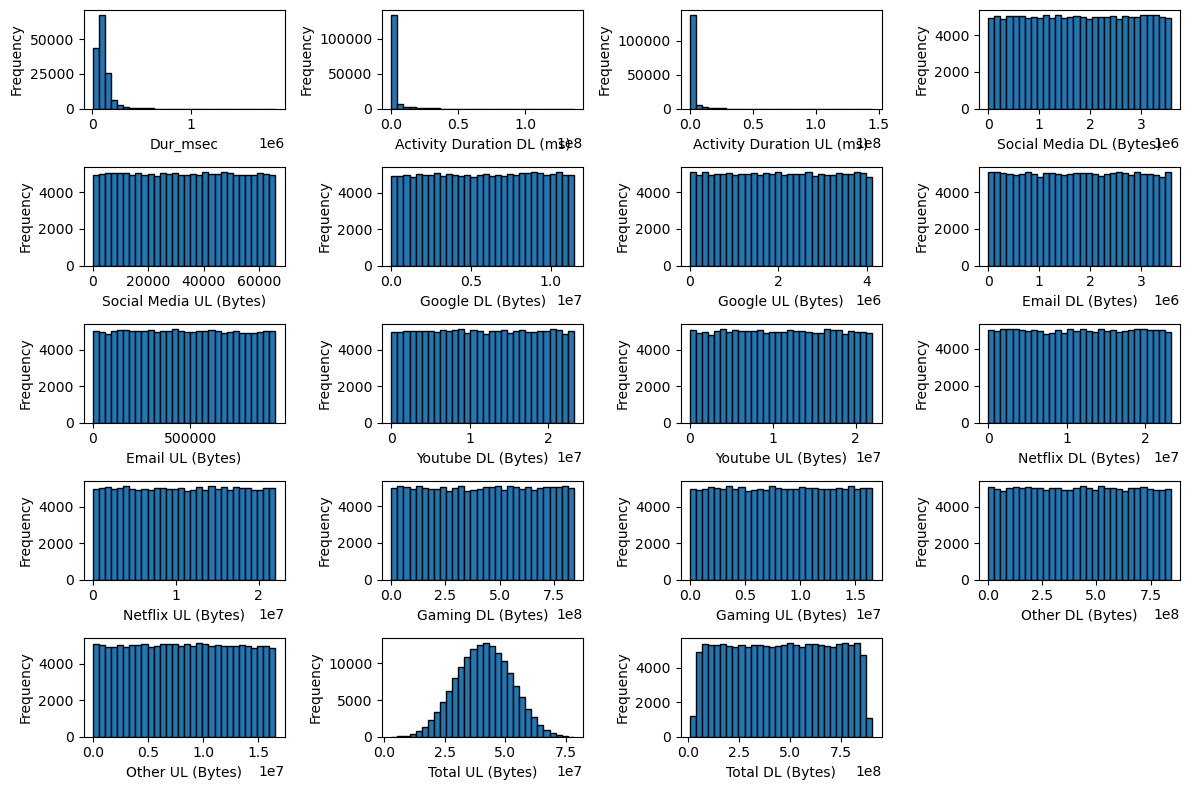

In [26]:
# Plot histograms for each quantitative variable
plt.figure(figsize=(12, 8))

for i, var in enumerate(quantitative_vars):
    plt.subplot(5, 4, i+1)
    plt.hist(data[var], bins=30, edgecolor='black')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

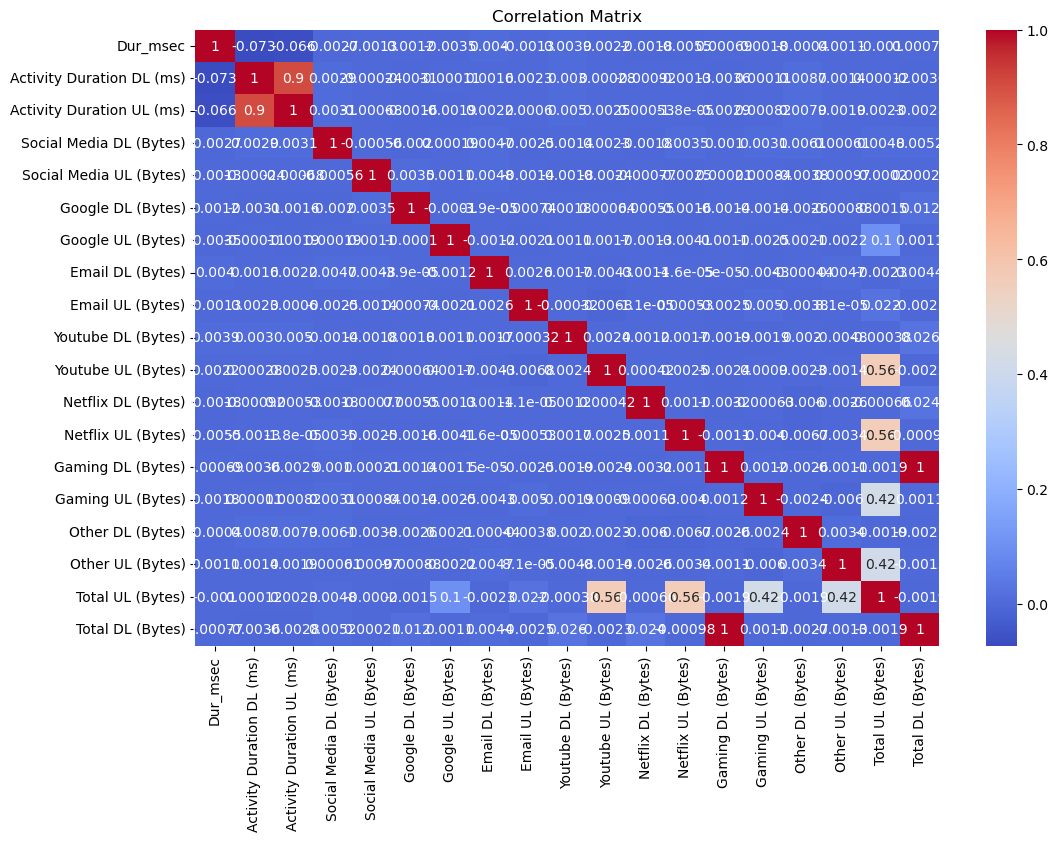

In [27]:
# Bivariate Analysis---- correlation matrix as a heatmap

variables = ['Dur_msec', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']

correlation_matrix = data[variables].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [28]:
non_categorical_columns=[]
for col in data.columns:
    if data[col].dtypes != "object":
        non_categorical_columns.append(col)

In [29]:
non_categorical_columns

['Dur_msec',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (Bytes)']

In [52]:
data.skew()

C:\Users\Naresh\AppData\Local\Temp\ipykernel_4668\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


Dur_msec                     3.952622
Activity Duration DL (ms)    5.872275
Activity Duration UL (ms)    7.382581
Social Media DL (Bytes)     -0.002136
Social Media UL (Bytes)     -0.000359
Google DL (Bytes)           -0.008092
Google UL (Bytes)            0.002216
Email DL (Bytes)            -0.002463
Email UL (Bytes)             0.007358
Youtube DL (Bytes)           0.000231
Youtube UL (Bytes)          -0.001142
Netflix DL (Bytes)          -0.002442
Netflix UL (Bytes)          -0.000113
Gaming DL (Bytes)           -0.003460
Gaming UL (Bytes)           -0.001840
Other DL (Bytes)             0.001400
Other UL (Bytes)             0.001392
Total UL (Bytes)            -0.002456
Total DL (Bytes)            -0.003153
dtype: float64

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Naresh\AppData\Local\Temp\ipykernel_4668\381808315.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = data.skew()


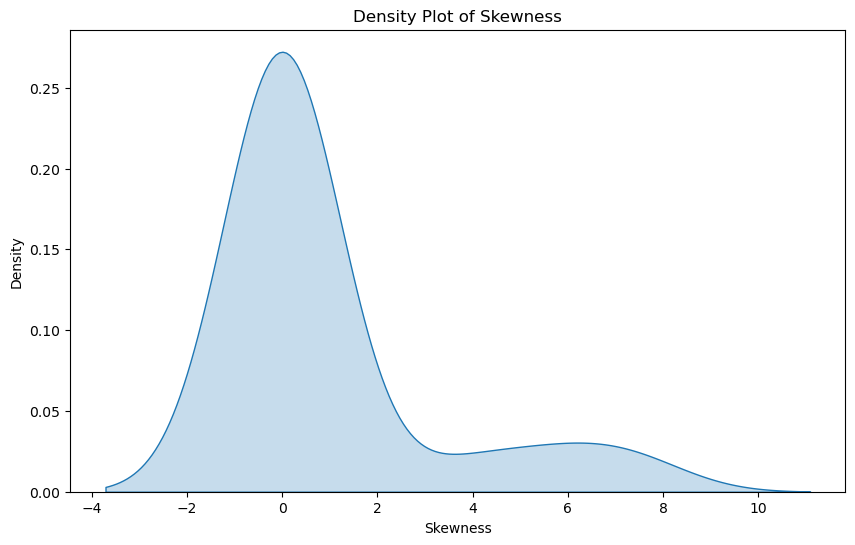

In [53]:
features = ['Dur_msec', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Social Media DL (Bytes)',
            'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
            'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)',
            'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
            'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']
# Calculate the skewness of each feature
skewness = data.skew()

# Plot the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(skewness, shade=True)
plt.xlabel('Skewness')
plt.ylabel('Density')
plt.title('Density Plot of Skewness')
plt.show()